<a href="https://colab.research.google.com/github/user1855/DMC_courses/blob/main/PEA/Supervised%20Models/C1_Regresi%C3%B3n_Lineal_con_Statmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción  la regresión lineal**

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Regresi%C3%B3n.csv'

In [ ]:
url

'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Regresi%C3%B3n.csv'

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head() # ventas : variable dependiente (y)

,area,publicidad_exterior,num_productos,delivery,ventas
0,52.324250,0,28.717111,1,83188
1,53.972180,0,24.061171,1,68638
2,53.231438,0,16.724146,1,84210
3,43.583231,0,29.307826,1,82888
4,36.769380,0,18.313163,0,57796


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 1116 non-null   float64
 1   publicidad_exterior  1116 non-null   int64  
 2   num_productos        1116 non-null   float64
 3   delivery             1116 non-null   int64  
 4   ventas               1116 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 43.7 KB


## **Análisis descriptivo**

In [ ]:
data.describe()

,area,publicidad_exterior,num_productos,delivery,ventas
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,46.055877,0.212366,20.047960,0.776882,64003.767025
std,6.428687,0.409166,6.978012,0.416524,11473.470051
min,29.806932,0.000000,5.000000,0.000000,35143.000000
25%,41.650478,0.000000,15.603763,1.000000,56872.000000
50%,45.802647,0.000000,19.184180,1.000000,62856.000000
75%,50.268284,0.000000,24.061171,1.000000,71023.250000
max,68.099009,1.000000,47.266020,1.000000,108296.000000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'publicidad_exterior'}>],
       [<Axes: title={'center': 'num_productos'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'ventas'}>, <Axes: >]], dtype=object)

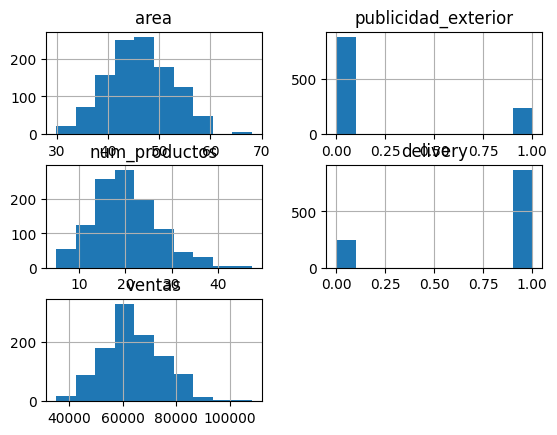

In [ ]:
data.hist()

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'publicidad_exterior'}>],
       [<Axes: title={'center': 'num_productos'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'ventas'}>, <Axes: >]], dtype=object)

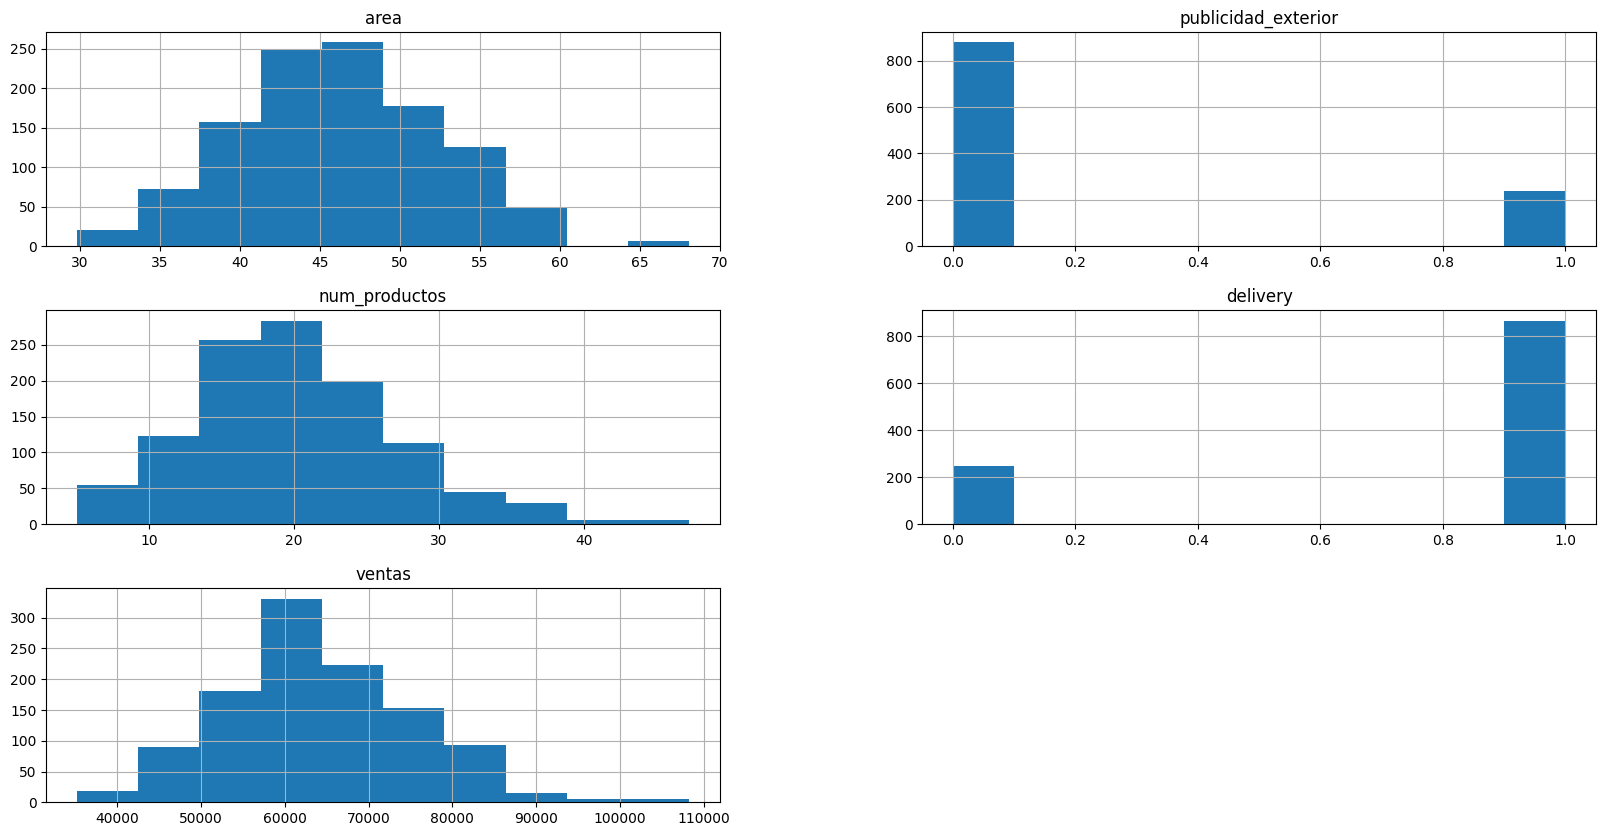

In [ ]:
data.hist(figsize = (20,10))

<Axes: >

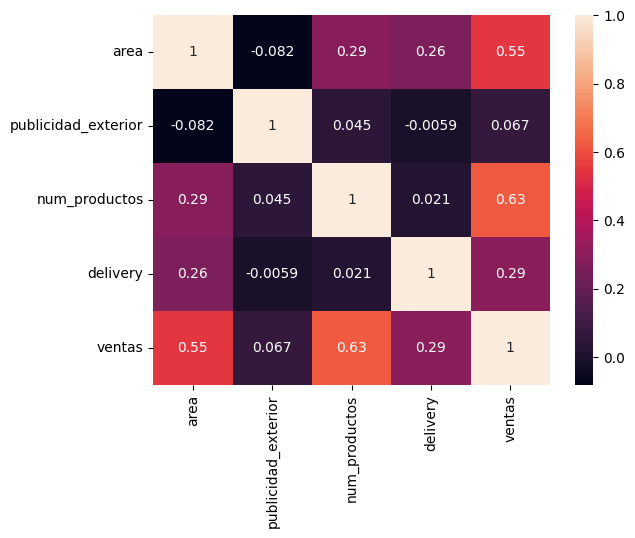

In [ ]:
sb.heatmap(data.corr(), annot = data.corr())

In [ ]:
corr = data.corr()

In [ ]:
corr

,area,publicidad_exterior,num_productos,delivery,ventas
area,1.000000,-0.081763,0.287728,0.263135,0.546376
publicidad_exterior,-0.081763,1.000000,0.045441,-0.005899,0.067203
num_productos,0.287728,0.045441,1.000000,0.020919,0.625677
delivery,0.263135,-0.005899,0.020919,1.000000,0.293886
ventas,0.546376,0.067203,0.625677,0.293886,1.000000


In [ ]:
corr[['ventas']].sort_values(by = 'ventas', ascending = False)

,ventas
ventas,1.000000
num_productos,0.625677
area,0.546376
delivery,0.293886
publicidad_exterior,0.067203


In [ ]:
corr[['ventas']].sort_values(by = 'ventas', ascending = False).style.background_gradient()

,ventas
ventas,1.000000
num_productos,0.625677
area,0.546376
delivery,0.293886
publicidad_exterior,0.067203


<Axes: xlabel='ventas', ylabel='num_productos'>

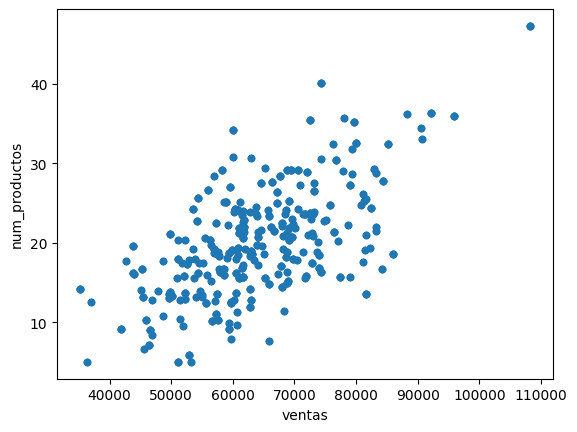

In [ ]:
data.plot.scatter(x='ventas', y='num_productos')

<Axes: xlabel='ventas', ylabel='area'>

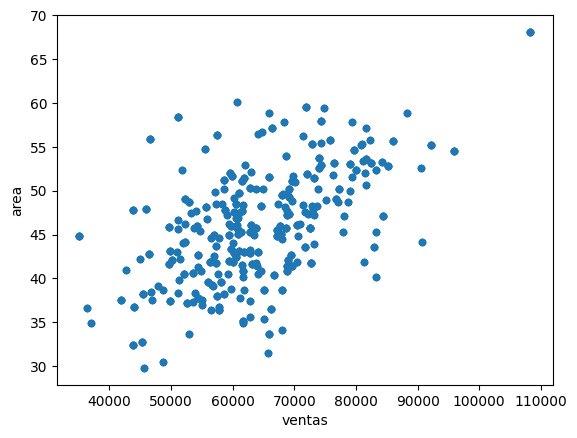

In [ ]:
data.plot.scatter(x='ventas', y='area')

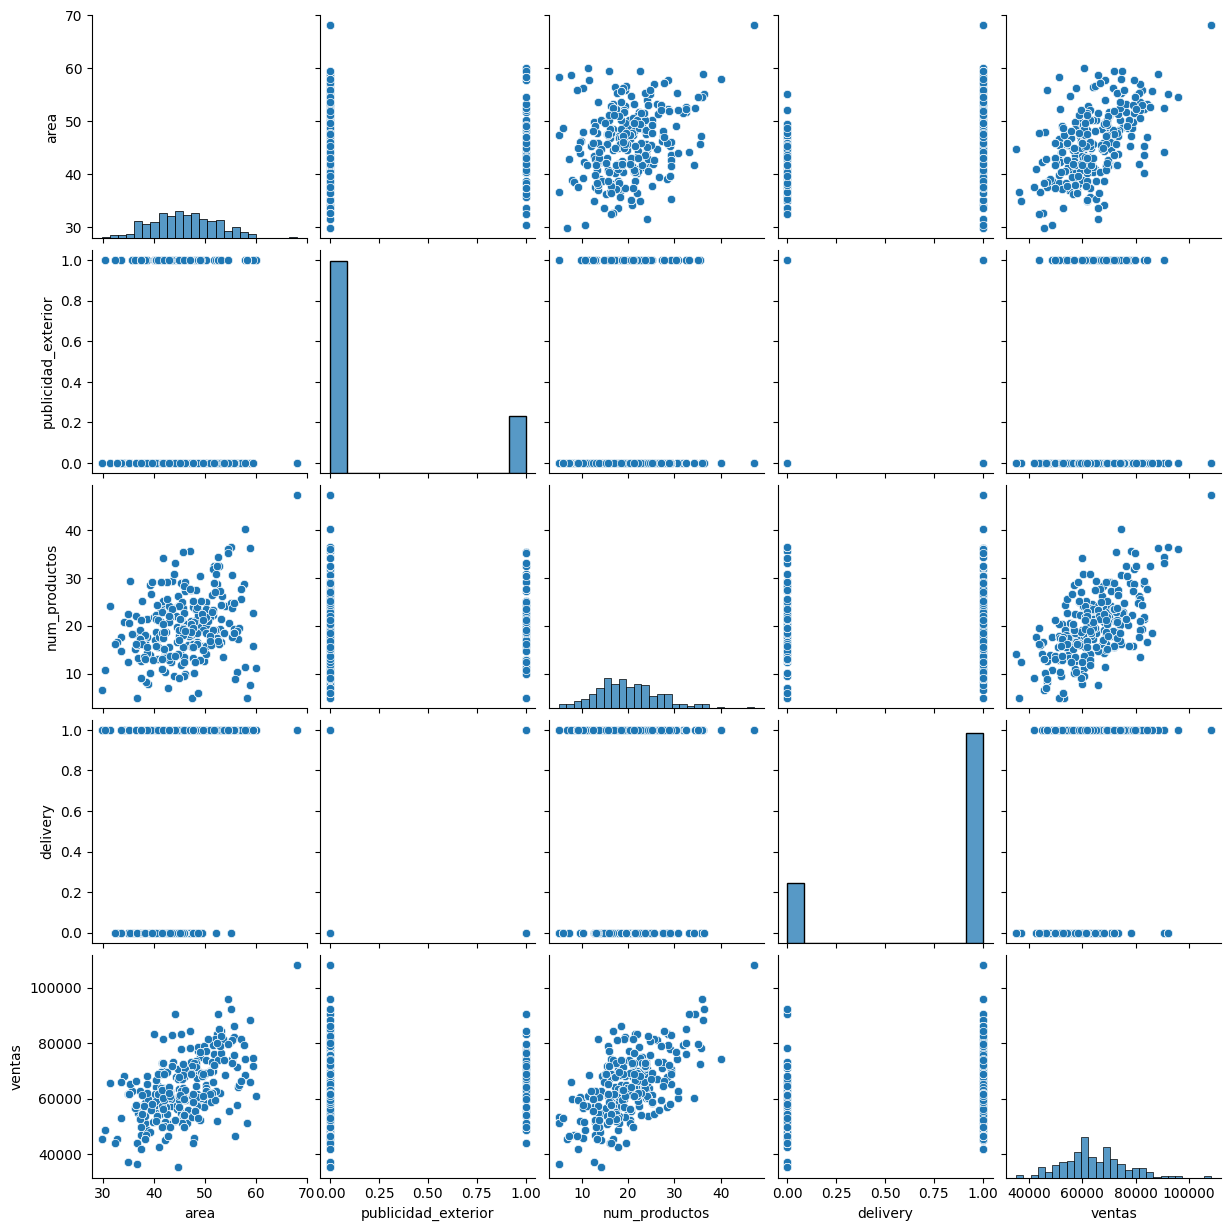

In [ ]:
sb.pairplot(data)

## **Modelo de Regresión**

ventas = Bo + B1 * area + B2 * num_productos

In [ ]:
x = data[['area', 'num_productos']]

In [ ]:
x

,area,num_productos
0,52.324250,28.717111
1,53.972180,24.061171
2,53.231438,16.724146
3,43.583231,29.307826
4,36.769380,18.313163
...,...,...
1111,57.897769,40.112189
1112,51.929088,28.919572
1113,47.682743,15.681251
1114,53.701732,18.477609


In [ ]:
x['constante'] = 1

<ipython-input-22-593472376bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['constante'] = 1


In [ ]:
x

,area,num_productos,constante
0,52.324250,28.717111,1
1,53.972180,24.061171,1
2,53.231438,16.724146,1
3,43.583231,29.307826,1
4,36.769380,18.313163,1
...,...,...,...
1111,57.897769,40.112189,1
1112,51.929088,28.919572,1
1113,47.682743,15.681251,1
1114,53.701732,18.477609,1


In [ ]:
y = data[['ventas']]

In [ ]:
y

,ventas
0,83188
1,68638
2,84210
3,82888
4,57796
...,...
1111,74351
1112,72003
1113,61589
1114,74027


In [ ]:
import statsmodels.api as sm

In [ ]:
modelo = sm.OLS(y, x) #definimos el modelo

In [ ]:
resultados = modelo.fit() #entrenamiento del modelo

In [ ]:
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     647.5
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          3.01e-187
Time:                        03:27:19   Log-Likelihood:                -11585.
No. Observations:                1116   AIC:                         2.318e+04
Df Residuals:                    1113   BIC:                         2.319e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
area            712.8533     37.976     18.771

ventas = 1.434e+04  + 712.8533 * area + 839.7967 *  num_productos

In [ ]:
tabla_resultados = resultados.predict(x)

In [ ]:
tabla_resultados

0       75752.521680
1       73017.211653
2       66327.561536
3       70017.537992
4       55926.979430
            ...     
1111    89295.173277
1112    75640.855293
1113    61496.335407
1114    68135.364700
1115    82792.242932
Length: 1116, dtype: float64

# **Simulador**

In [ ]:
area = 50
num_productos = 10

In [ ]:
ventas = 1.434e+04 + 712.853 * area + 839.7967 * num_productos

In [ ]:
ventas

58380.617